In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
#read unstructured csv to appropriate dataframe representation
diabetes_df = pd.read_csv('diabetes_data.csv')
columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weightloss', 'weakness', 'polyphagia',
          'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
          'muscle_stiffness', 'alopecia', 'obesity', 'class']
diabetes_df = diabetes_df.iloc[:,0].str.split(';', expand=True)
diabetes_df.columns = columns
diabetes_df.head()


,age,gender,polyuria,polydipsia,sudden_weightloss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [39]:
#check column data types
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                520 non-null    object
 1   gender             520 non-null    object
 2   polyuria           520 non-null    object
 3   polydipsia         520 non-null    object
 4   sudden_weightloss  520 non-null    object
 5   weakness           520 non-null    object
 6   polyphagia         520 non-null    object
 7   genital_thrush     520 non-null    object
 8   visual_blurring    520 non-null    object
 9   itching            520 non-null    object
 10  irritability       520 non-null    object
 11  delayed_healing    520 non-null    object
 12  partial_paresis    520 non-null    object
 13  muscle_stiffness   520 non-null    object
 14  alopecia           520 non-null    object
 15  obesity            520 non-null    object
 16  class              520 non-null    object
dt

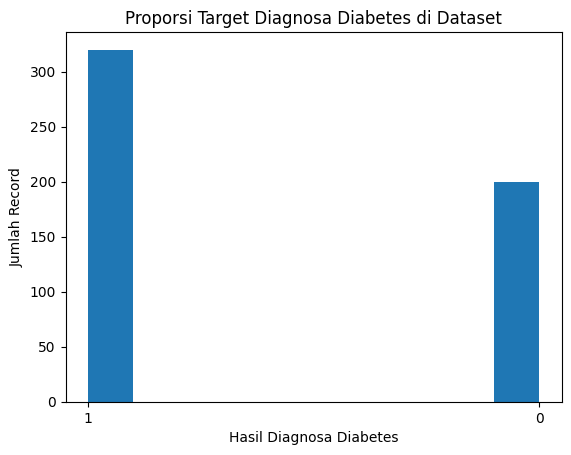

In [40]:
#checking target variable distribution
plt.hist(diabetes_df['class'])
plt.title('Proporsi Target Diagnosa Diabetes di Dataset')
plt.xlabel('Hasil Diagnosa Diabetes')
plt.ylabel('Jumlah Record')
plt.show()

In [41]:
#drop column unrelated to diagnose result
diabetes_pre = diabetes_df.drop('gender', axis = 1)
#setting column data types to correct one
diabetes_pre = diabetes_pre.astype(int)
diabetes_pre.drop_duplicates()
diabetes_pre.info()
#dataset free from null values, no need for imputation
#all column can be considered as numerical (binary categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                520 non-null    int32
 1   polyuria           520 non-null    int32
 2   polydipsia         520 non-null    int32
 3   sudden_weightloss  520 non-null    int32
 4   weakness           520 non-null    int32
 5   polyphagia         520 non-null    int32
 6   genital_thrush     520 non-null    int32
 7   visual_blurring    520 non-null    int32
 8   itching            520 non-null    int32
 9   irritability       520 non-null    int32
 10  delayed_healing    520 non-null    int32
 11  partial_paresis    520 non-null    int32
 12  muscle_stiffness   520 non-null    int32
 13  alopecia           520 non-null    int32
 14  obesity            520 non-null    int32
 15  class              520 non-null    int32
dtypes: int32(16)
memory usage: 32.6 KB


In [42]:
#Splitting target and predictor variable
y = diabetes_pre['class']
X = diabetes_pre.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=123)
X_train, y_train

(     age  polyuria  polydipsia  sudden_weightloss  weakness  polyphagia  \
 252   39         1           1                  1         1           1   
 513   62         1           1                  1         1           0   
 401   36         0           0                  0         0           0   
 276   30         0           0                  0         0           0   
 73    38         1           1                  1         1           1   
 ..   ...       ...         ...                ...       ...         ...   
 69    50         1           1                  1         1           1   
 299   43         1           1                  1         1           1   
 333   30         0           0                  0         0           0   
 246   46         0           0                  0         1           0   
 62    55         1           1                  0         1           1   
 
      genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
 252 

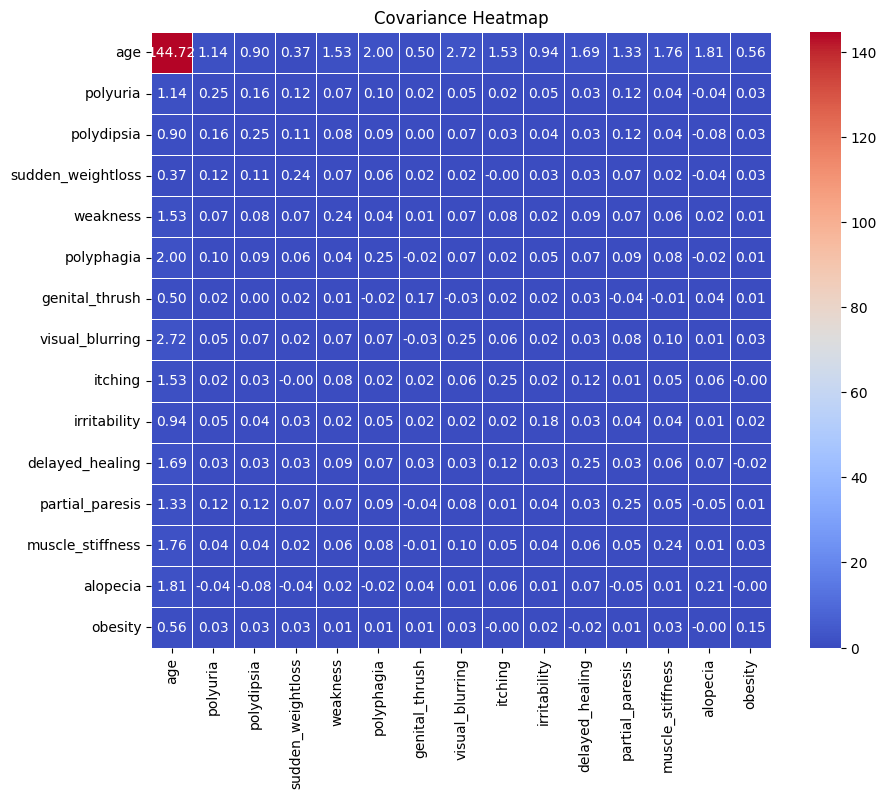

In [43]:
#check covariance between each
plt.figure(figsize=(10,8))
sns.heatmap(X_train.cov(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Covariance Heatmap')
plt.show()

In [44]:
X_train['age'].describe()

count    364.000000
mean      48.076923
std       12.030018
min       25.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: age, dtype: float64

In [45]:
X_train['age'].value_counts(normalize=True).sort_index(ascending=False)
#it seem that all value is equally low in sample amount

age
90    0.002747
85    0.005495
72    0.010989
70    0.010989
69    0.005495
68    0.021978
67    0.016484
66    0.016484
65    0.016484
64    0.013736
63    0.002747
62    0.019231
61    0.016484
60    0.032967
59    0.002747
58    0.030220
57    0.030220
56    0.010989
55    0.046703
54    0.038462
53    0.032967
52    0.008242
51    0.008242
50    0.043956
49    0.016484
48    0.052198
47    0.032967
46    0.016484
45    0.027473
44    0.010989
43    0.052198
42    0.013736
41    0.008242
40    0.043956
39    0.041209
38    0.041209
37    0.005495
36    0.019231
35    0.046703
34    0.013736
33    0.008242
32    0.005495
31    0.005495
30    0.054945
29    0.002747
28    0.013736
27    0.016484
26    0.002747
25    0.002747
Name: proportion, dtype: float64

In [46]:
#reclassify age based on their mean
X_knn_train = X_train.copy()
# 48 is selected because mean is higher than 48
# over 48 is classified as 1 in expectation the higher age the more likely diabetes shows
# similar to many other column, expected is diagnosed positive, the more likely diabetes shows
# this approach is done in concern that lowest age identified with diabetes presence is 7 years old for diabetes type 1
#it is unknown which type of diabetes the dataset identifies
X_knn_train['age_class'] = X_knn_train['age'].apply(lambda x : 1 if x > 48
                                                   else 0)
X_knn_train.drop('age', axis = 1, inplace=True)
X_knn_train['age_class'].value_counts(normalize=True)


age_class
0    0.538462
1    0.461538
Name: proportion, dtype: float64

In [47]:
#Data standardization is not needed since all column varies on 1 or 0
#ohe is not done to keep dimensionality low
#there is no null values in all column so no imputation done
#defining baseline
y_train.value_counts(normalize=True)
#model baseline is 61%

class
1    0.615385
0    0.384615
Name: proportion, dtype: float64

In [48]:
#run knn algorithm to X_knn_train
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_knn_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [49]:
#have new y prediction values based on knn trained algorithm
y_knn_predict = pd.DataFrame(knn.predict(X_knn_train))

In [50]:
#display metric relating to model
knn_accuracy = accuracy_score(y_train, y_knn_predict)
knn_cm = confusion_matrix(y_train, y_knn_predict)
knn_cm_df = pd.DataFrame(knn_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
knn_cm_df


,Predicted Negative,Predicted Positive
Actual Negative,138,2
Actual Positive,24,200


In [51]:
print(f'knn accuracy : {knn_accuracy :.2f}')

knn accuracy : 0.93


In [52]:
#Evaluating hyperparameter tuning during cross validation
param_grid = {'n_neighbors' : [3,5,7,9]}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring ='accuracy')
grid_search.fit(X_knn_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
#test score across fold does not seem to vary extremely for every hyperparameter values

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002874,0.000983,0.005339,0.001974,3,{'n_neighbors': 3},0.891892,0.945946,0.972973,0.891892,0.916667,0.972222,0.777778,0.916667,0.888889,0.944444,0.911937,0.053806,1
1,0.002415,0.000642,0.004087,0.001091,5,{'n_neighbors': 5},0.864865,0.891892,0.945946,0.864865,0.916667,0.972222,0.750000,0.916667,0.916667,0.944444,0.898423,0.059284,2
2,0.001693,0.000454,0.003810,0.000605,7,{'n_neighbors': 7},0.864865,0.891892,0.864865,0.891892,0.916667,0.944444,0.750000,0.888889,0.888889,0.916667,0.881907,0.049603,3
3,0.002358,0.001008,0.004857,0.001387,9,{'n_neighbors': 9},0.891892,0.864865,0.837838,0.918919,0.888889,0.916667,0.750000,0.916667,0.888889,0.888889,0.876351,0.048328,4


In [53]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_knn_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [54]:
y_knn_predict = pd.DataFrame(knn.predict(X_knn_train))

In [55]:
knn_accuracy = accuracy_score(y_train, y_knn_predict)
knn_cm = confusion_matrix(y_train, y_knn_predict)
knn_cm_df = pd.DataFrame(knn_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
knn_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,140,0
Actual Positive,17,207


In [56]:
print(f'knn accuracy : {knn_accuracy :.2f}')

knn accuracy : 0.95


In [57]:
#evaluate knn performance on test data
X_knn_test = X_test.copy()
X_knn_test['age_class'] = X_knn_test['age'].apply(lambda x : 1 if x > 48
                                                   else 0)
X_knn_test.drop('age', axis = 1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 232 to 7
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                156 non-null    int32
 1   polyuria           156 non-null    int32
 2   polydipsia         156 non-null    int32
 3   sudden_weightloss  156 non-null    int32
 4   weakness           156 non-null    int32
 5   polyphagia         156 non-null    int32
 6   genital_thrush     156 non-null    int32
 7   visual_blurring    156 non-null    int32
 8   itching            156 non-null    int32
 9   irritability       156 non-null    int32
 10  delayed_healing    156 non-null    int32
 11  partial_paresis    156 non-null    int32
 12  muscle_stiffness   156 non-null    int32
 13  alopecia           156 non-null    int32
 14  obesity            156 non-null    int32
dtypes: int32(15)
memory usage: 10.4 KB


In [58]:
#predict y
y_knn_test_predict = pd.DataFrame(knn.predict(X_knn_test))

#display metric
knn_accuracy = accuracy_score(y_test, y_knn_test_predict)
knn_cm = confusion_matrix(y_test, y_knn_test_predict)
knn_cm_df = pd.DataFrame(knn_cm, index = ['Actual Negative', 'Actual Positive'], columns = ['Predicted Negative','Predicted Positive'])
knn_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,60,0
Actual Positive,16,80


In [59]:
print(f'knn accuracy : {knn_accuracy :.2f}')

knn accuracy : 0.90


In [60]:
#retrain knn with standardized age
X2_knn_train = X_train.copy()

scaler = StandardScaler()
X2_knn_train_scaled = scaler.fit_transform(X2_knn_train)
X2_knn_train_scaled

array([[-0.75556137,  0.97289468,  1.07417231, ..., -0.79977474,
        -0.67096885, -0.4662524 ],
       [ 1.15895431,  0.97289468,  1.07417231, ..., -0.79977474,
        -0.67096885,  2.14476106],
       [-1.00528081, -1.02786048, -0.93094934, ..., -0.79977474,
        -0.67096885, -0.4662524 ],
       ...,
       [-1.50471969, -1.02786048, -0.93094934, ..., -0.79977474,
        -0.67096885, -0.4662524 ],
       [-0.17288269, -1.02786048, -0.93094934, ..., -0.79977474,
         1.49038214, -0.4662524 ],
       [ 0.57627562,  0.97289468,  1.07417231, ...,  1.25035206,
        -0.67096885, -0.4662524 ]])

In [61]:
knn2 = KNeighborsClassifier(metric = 'euclidean')
knn2.fit(X2_knn_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [62]:
#Evaluating hyperparameter tuning during cross validation
param_grid = {'n_neighbors' : [3,5,7,9]}
grid_search = GridSearchCV(knn2, param_grid, cv=10, scoring ='accuracy')
grid_search.fit(X2_knn_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002784,0.001059,0.005063,0.001219,3,{'n_neighbors': 3},0.945946,0.864865,0.918919,0.864865,0.805556,0.972222,0.777778,0.944444,0.916667,0.888889,0.890015,0.059491,1
1,0.002106,0.000622,0.004494,0.001083,5,{'n_neighbors': 5},0.891892,0.891892,0.864865,0.756757,0.777778,0.944444,0.666667,0.888889,0.861111,0.861111,0.840541,0.078126,3
2,0.001801,0.000400,0.003453,0.000913,7,{'n_neighbors': 7},0.891892,0.864865,0.918919,0.783784,0.833333,0.944444,0.638889,0.916667,0.888889,0.888889,0.857057,0.084763,2
3,0.002448,0.000857,0.004993,0.001133,9,{'n_neighbors': 9},0.837838,0.783784,0.837838,0.756757,0.861111,0.888889,0.638889,0.888889,0.888889,0.916667,0.829955,0.079391,4


In [63]:
y2_knn_predict = pd.DataFrame(knn2.predict(X2_knn_train))

In [64]:
knn2_accuracy = accuracy_score(y_train, y2_knn_predict)
knn_cm = confusion_matrix(y_train, y2_knn_predict)
knn_cm_df = pd.DataFrame(knn_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
knn_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,134,6
Actual Positive,21,203


In [65]:
print(f'knn accuracy with standardized age : {knn2_accuracy :.2f}')

knn accuracy with standardized age : 0.93


In [66]:
X2_knn_test = X_test.copy()

X2_knn_test_scaled = scaler.fit_transform(X2_knn_test)
X2_knn_test_scaled

array([[ 0.6503738 , -0.91394426,  1.19895788, ...,  1.39405747,
         1.16774842, -0.41585133],
       [ 0.40899796,  1.09415863, -0.83405766, ..., -0.71733054,
        -0.85634884, -0.41585133],
       [ 0.16762211, -0.91394426, -0.83405766, ..., -0.71733054,
         1.16774842, -0.41585133],
       ...,
       [ 0.81129103, -0.91394426,  1.19895788, ...,  1.39405747,
        -0.85634884, -0.41585133],
       [-0.39558819, -0.91394426, -0.83405766, ..., -0.71733054,
         1.16774842, -0.41585133],
       [ 1.45495995,  1.09415863,  1.19895788, ...,  1.39405747,
        -0.85634884, -0.41585133]])

In [67]:
y2_knn_test_predict = pd.DataFrame(knn2.predict(X2_knn_test))

In [68]:
knn2_accuracy = accuracy_score(y_test, y2_knn_test_predict)
knn_cm = confusion_matrix(y_test, y2_knn_test_predict)
knn_cm_df = pd.DataFrame(knn_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
knn_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,59,1
Actual Positive,22,74


In [70]:
print(f'knn accuracy with standardized test data : {knn2_accuracy :.2f}')

knn accuracy with standardized test data : 0.85
